In [1]:
using WebSockets
using JSON
using PyPlot
using TimerOutputs

In [2]:
time_msg = JSON.json(Dict("time" => 0))
sig_msg = JSON.json(Dict("sig" => false))

"{\"sig\":false}"

In [3]:
lats = []
lons = []
WebSockets.open("wss://ws5.blitzortung.org:3000") do ws_client
    send_bytes = 0
    rec_bytes = 0
    start = time()
    success = writeguarded(ws_client, time_msg)
    send_bytes += length(time_msg)
    println(success)
    success = writeguarded(ws_client, sig_msg)
    send_bytes += length(time_msg)
    println(success)

    for k in 0:10
        data, success = readguarded(ws_client)
        rec_bytes += length(data)
        data = JSON.parse(String(data))
        println(success, " ",
                data["lat"], ", ", data["lon"])
        if success
            append!(lats, [data["lat"]])
            append!(lons, [data["lon"]])
        end
        # This only has to be sent every ~30 seconds, I think, as a keepalive.
        success = writeguarded(ws_client, "{}")
        send_bytes += length("{}")
        sleep(0.1)
    end
    elapsed = time() - start
    println("Send bw: ", send_bytes / elapsed)
    println("Recv bw: ", rec_bytes / elapsed)
end


HTTP.Messages.Response:
"""
HTTP/1.1 400 Bad Request
Server: nginx/1.14.0 (Ubuntu)
Date: Mon, 24 May 2021 05:32:41 GMT
Content-Type: text/html
Content-Length: 280
Connection: close

"""

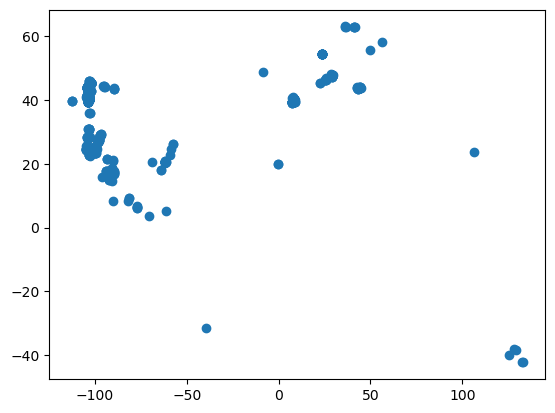

PyObject <matplotlib.collections.PathCollection object at 0x000000004AAB6430>

In [4]:
#figure((3, 3))
scatter(lons, lats)